In [45]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.metrics import accuracy_score

### Preprocessing


In [2]:
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,KNDCE3LG3L,King,RENTON,WA,98059,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,11.0,128569878,POINT (-122.132064 47.494834)
1,KNDCE3LG9K,King,SEATTLE,WA,98108,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,38500,37.0,105987073,POINT (-122.31336800000001 47.54411)
2,KNDCC3LG5L,King,RENTON,WA,98057,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,114300301,POINT (-122.215501 47.476576)
3,1G1FY6S00K,Thurston,YELM,WA,98597,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,36620,2.0,113112303,POINT (-122.558621 46.888349)
4,1N4AZ0CP6F,Chelan,LEAVENWORTH,WA,98826,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,12.0,330944169,POINT (-120.73040299999998 47.74993200000001)


In [5]:
data.shape #Gives the dimensions of dataset

(62261, 15)

In [6]:
data.info() #Gives info of the type of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62261 entries, 0 to 62260
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         62261 non-null  object 
 1   County                                             62260 non-null  object 
 2   City                                               62261 non-null  object 
 3   State                                              62261 non-null  object 
 4   ZIP Code                                           62261 non-null  int64  
 5   Model Year                                         62261 non-null  int64  
 6   Make                                               62261 non-null  object 
 7   Model                                              62261 non-null  object 
 8   Electric Vehicle Type                              62261 non-null  object 
 9   Clean 

In [7]:
#number of null values in each column
data.isnull().sum()


VIN (1-10)                                            0
County                                                1
City                                                  0
State                                                 0
ZIP Code                                              0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 39
DOL Vehicle ID                                        0
Vehicle Location                                      2
dtype: int64

In [8]:
#dropping the column state
data.drop("State", inplace=True, axis=1)
data.shape

(62261, 14)

In [9]:
data.head()

,VIN (1-10),County,City,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,KNDCE3LG3L,King,RENTON,98059,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,11.0,128569878,POINT (-122.132064 47.494834)
1,KNDCE3LG9K,King,SEATTLE,98108,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,38500,37.0,105987073,POINT (-122.31336800000001 47.54411)
2,KNDCC3LG5L,King,RENTON,98057,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,114300301,POINT (-122.215501 47.476576)
3,1G1FY6S00K,Thurston,YELM,98597,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,36620,2.0,113112303,POINT (-122.558621 46.888349)
4,1N4AZ0CP6F,Chelan,LEAVENWORTH,98826,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,12.0,330944169,POINT (-120.73040299999998 47.74993200000001)


In [10]:
data.dropna(subset=['County',"Legislative District","Vehicle Location"],axis=0,inplace=True) 


In [11]:
data.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
dtype: int64

In [12]:
data['Base MSRP'].replace(0,data['Base MSRP'].mean(),inplace=True)


C:\Users\ADMIN\anaconda3\envs\tfgpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Electric Range'>

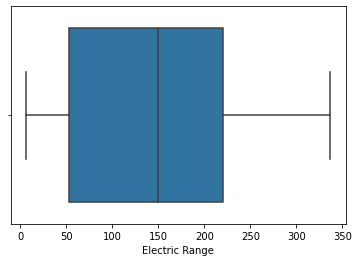

In [13]:
sns.boxplot(data['Electric Range'])

(51781, 14)


C:\Users\ADMIN\anaconda3\envs\tfgpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Base MSRP'>

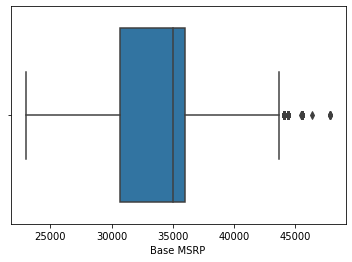

In [12]:
#DETECTION AND REMOVAL OF OUTLIERS FOR Base MSRP

Q1 = data["Base MSRP"].quantile(0.25)
Q3 = data["Base MSRP"].quantile(0.75)
IQR = Q3 - Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

#REMOVE OUTLIERS
data_filtered=data[(data['Base MSRP']>lower_limit) & (data['Base MSRP']<upper_limit)]
data_filtered.shape
print(data_filtered.shape)

sns.boxplot(data_filtered['Base MSRP'])

In [14]:
for value,count in data['Base MSRP'].value_counts().iteritems():
    if(count<100):
        data.drop(data.loc[data['Base MSRP']==value].index,inplace=True)

(50426, 14)


C:\Users\ADMIN\anaconda3\envs\tfgpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Base MSRP'>

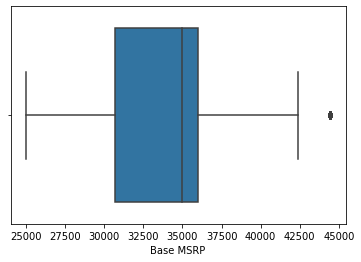

In [15]:
#DETECTION AND REMOVAL OF OUTLIERS FOR ELECTRIC RANGE

Q1 = data["Base MSRP"].quantile(0.25)
Q3 = data["Base MSRP"].quantile(0.75)
IQR = Q3 - Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

#REMOVE OUTLIERS
data_filtered=data[(data['Base MSRP']>lower_limit) & (data['Base MSRP']<upper_limit)]
data_filtered.shape
print(data_filtered.shape)

sns.boxplot(data_filtered['Base MSRP'])

### Exploratory Data Analysis


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2844/502525827.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


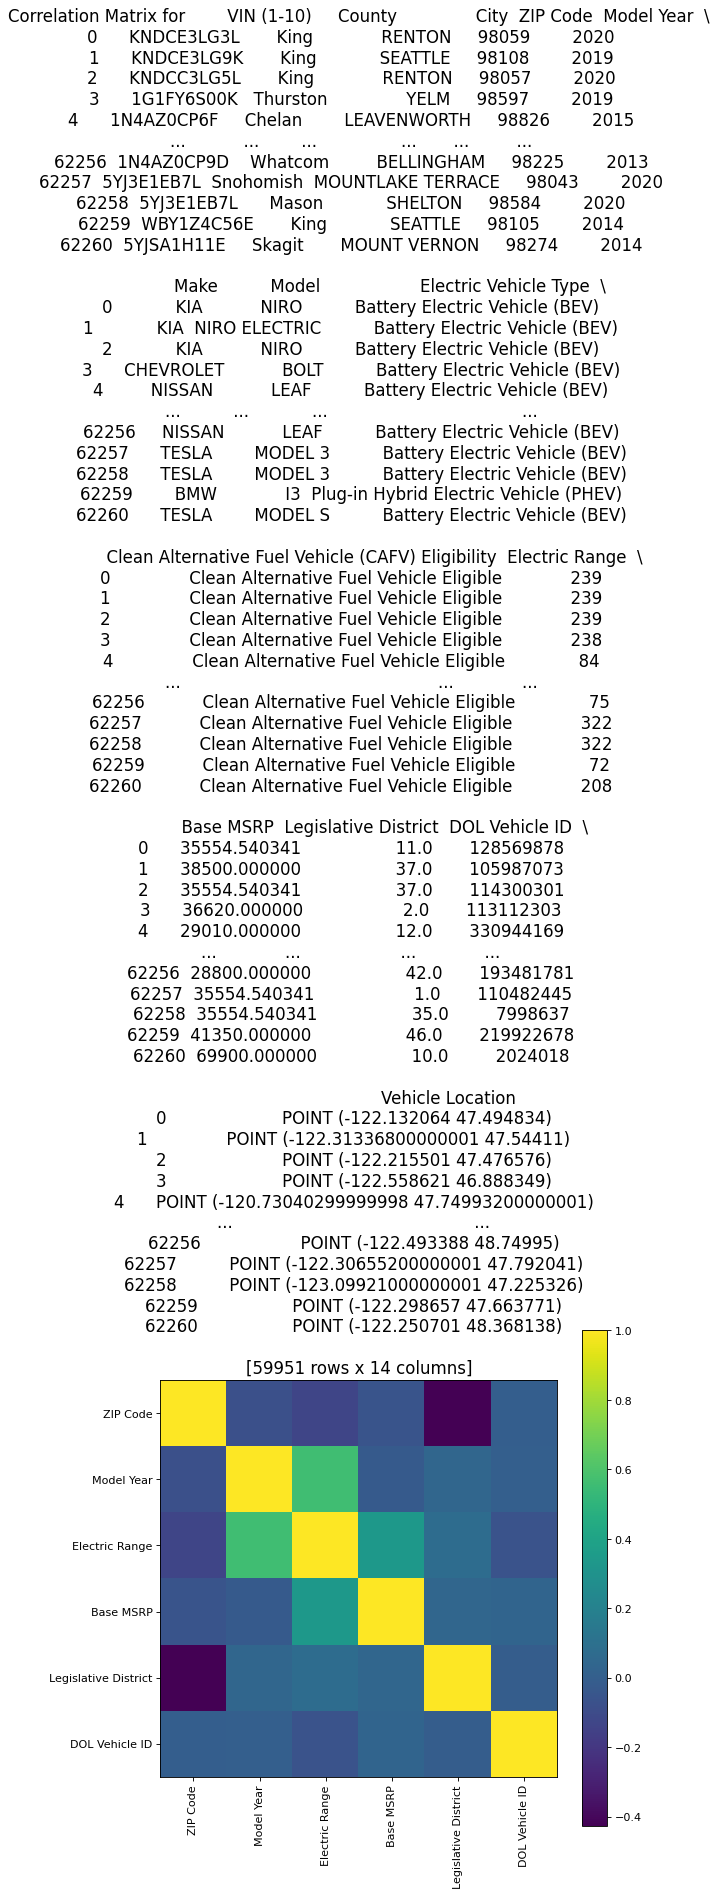

In [16]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
#         print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(data, 8)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2844/967723297.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2844/967723297.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2844/967723297.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2844/967723297.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and 

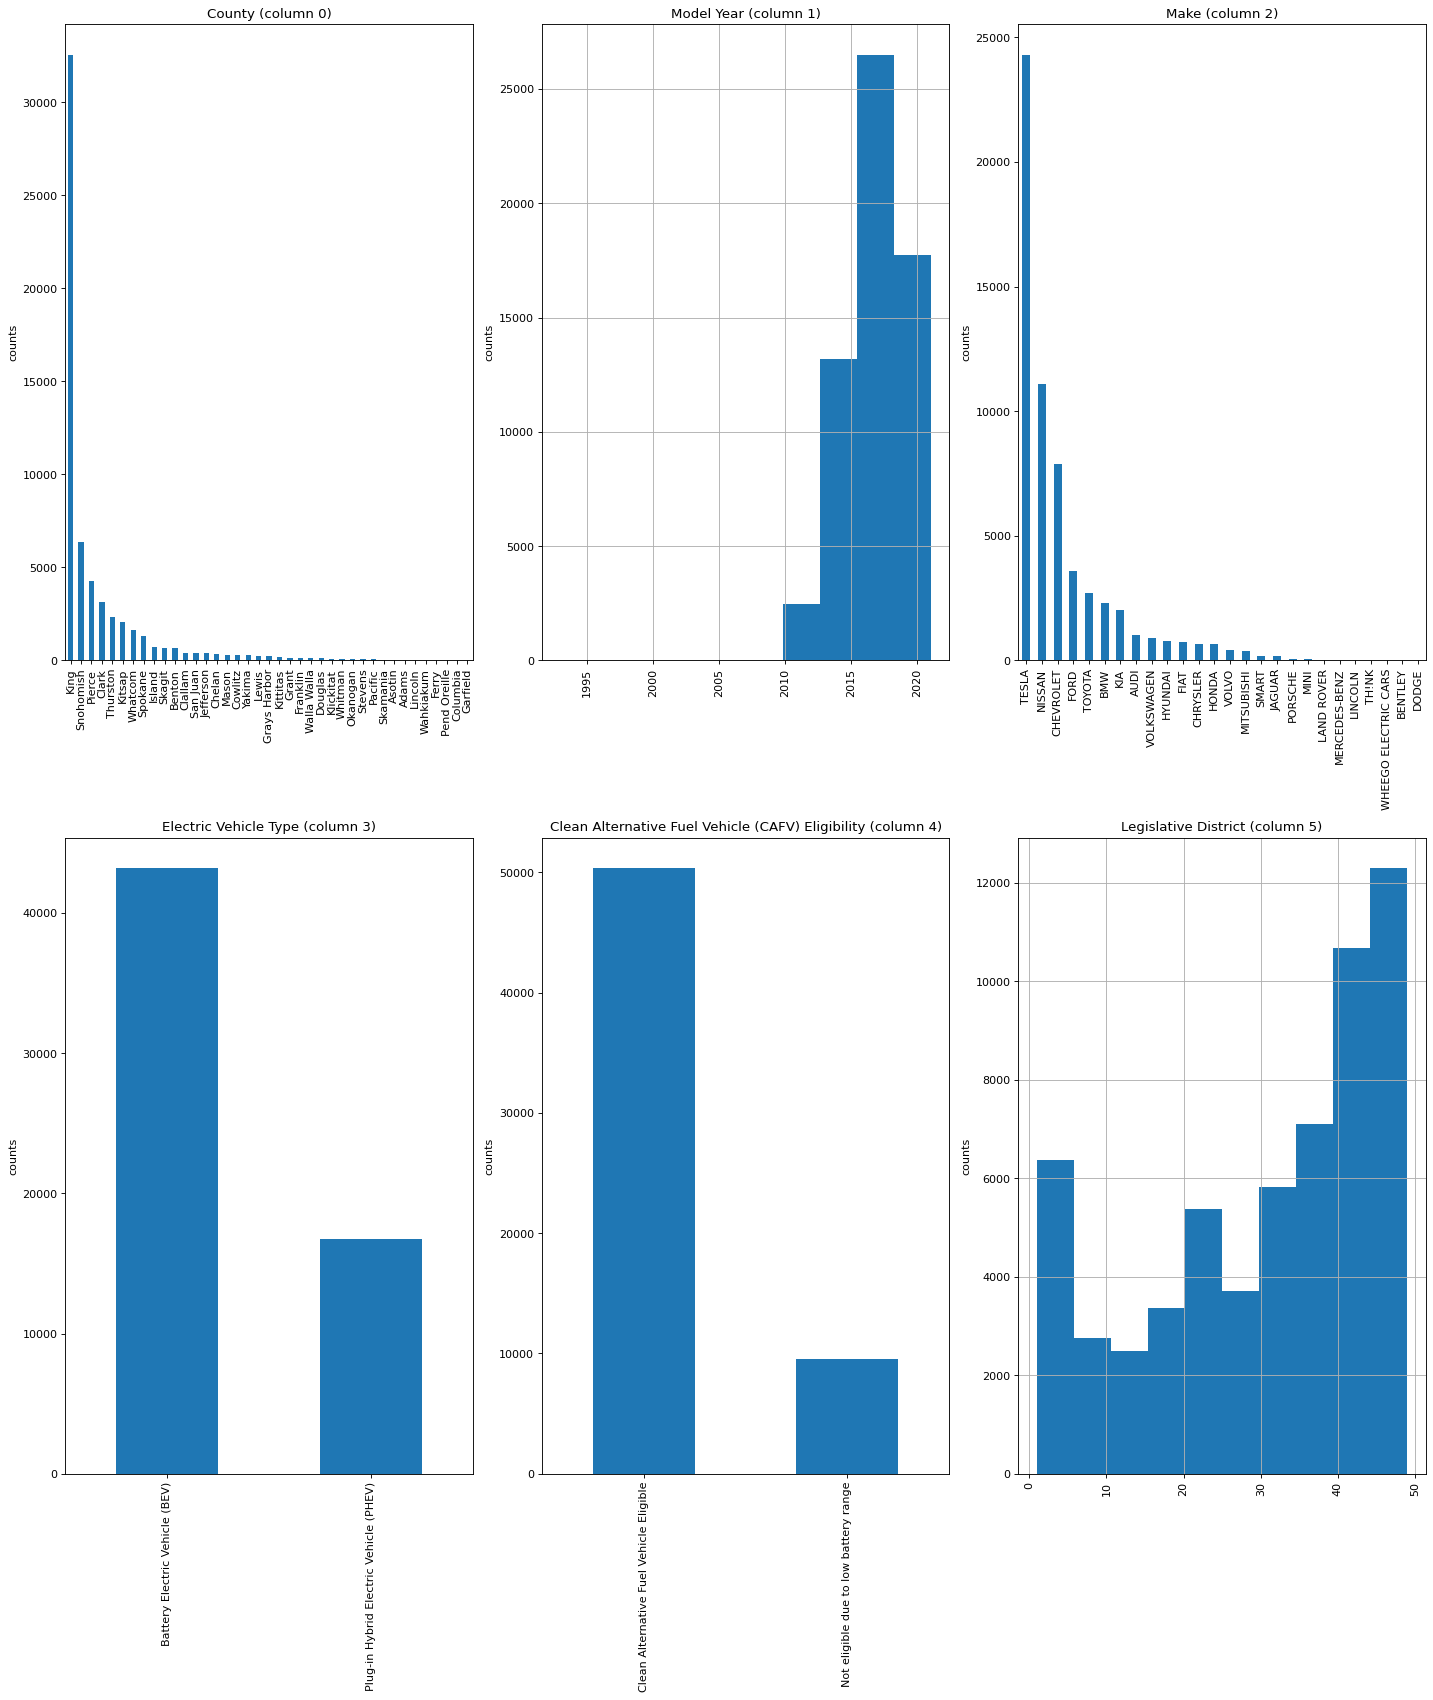

In [17]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(data, 10, 3)

In [18]:
data['Base MSRP'].value_counts()

35554.540341    8539
36000.000000    6098
35000.000000    3924
29010.000000    3148
29990.000000    2830
                ... 
63750.000000     113
39200.000000     107
33520.000000     104
67800.000000     103
68100.000000     103
Name: Base MSRP, Length: 74, dtype: int64

In [19]:
data.head()

,VIN (1-10),County,City,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,KNDCE3LG3L,King,RENTON,98059,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,35554.540341,11.0,128569878,POINT (-122.132064 47.494834)
1,KNDCE3LG9K,King,SEATTLE,98108,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,38500.000000,37.0,105987073,POINT (-122.31336800000001 47.54411)
2,KNDCC3LG5L,King,RENTON,98057,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,35554.540341,37.0,114300301,POINT (-122.215501 47.476576)
3,1G1FY6S00K,Thurston,YELM,98597,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,36620.000000,2.0,113112303,POINT (-122.558621 46.888349)
4,1N4AZ0CP6F,Chelan,LEAVENWORTH,98826,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010.000000,12.0,330944169,POINT (-120.73040299999998 47.74993200000001)


In [20]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range'], dtype=object)

In [21]:
data['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [22]:
data['Model'].unique()

array(['NIRO', 'NIRO ELECTRIC', 'BOLT', 'LEAF', 'C-MAX ENERGI', 'MODEL Y',
       'I3S', 'PACIFICA HYBRID', 'MODEL 3', 'MODEL X', 'VOLT',
       'FUSION ENERGI', 'SONATA PLUG-IN HYBRID', 'PRIUS', 'X5 XDRIVE40E',
       'MODEL S', 'OUTLANDER - PHEV', 'E-GOLF', 'PRIUS PRIME', 'BOLT EV',
       'A3 E-TRON', 'NIRO PLUG-IN HYBRID', 'KONA', 'I3', 'GLC-CLASS',
       'FUSION ENERGI PLUG-IN HYBRID', 'Q5 E', 'E-TRON', 'CLARITY',
       'I3 WITH RANGE EXTENDER', 'SONATA', 'FUSION',
       'SMART FORTWO ELECTRIC DRIVE COUPE', 'OUTLANDER', 'PACIFICA',
       'SOUL', 'OUTLANDER PHEV', 'I3S WITH RANGE EXTENDER', 'CAYENNE',
       'RANGE ROVER SPORT', 'E-TRON SPORTBACK', 'S-CLASS',
       'BENTAYGA HYBRID', 'FOCUS', 'I-PACE', '500E', 'XC60 AWD', 'COOPER',
       'AVIATOR', 'PANAMERA', 'XC60 AWD PHEV', 'RANGER', 'XC90 AWD',
       'IONIQ', 'RAV4 EV', 'CITY', 'LIFE',
       'FUSION SPECIAL SERVICE VEHICLE PHEV', 'CARAVAN', 'FORTWO', 'I8',
       '500', '530E XDRIVE', 'A8 E', 'RANGE ROVER', 'S-10 PICKUP

In [23]:
data['Make'].unique()


array(['KIA', 'CHEVROLET', 'NISSAN', 'FORD', 'TESLA', 'BMW', 'CHRYSLER',
       'HYUNDAI', 'TOYOTA', 'MITSUBISHI', 'VOLKSWAGEN', 'AUDI',
       'MERCEDES-BENZ', 'HONDA', 'SMART', 'PORSCHE', 'LAND ROVER',
       'BENTLEY', 'JAGUAR', 'FIAT', 'VOLVO', 'MINI', 'LINCOLN', 'TH!NK',
       'WHEEGO ELECTRIC CARS', 'DODGE'], dtype=object)

In [24]:
data['Model Year'].unique()

array([2020, 2019, 2015, 2017, 2013, 2018, 2014, 2016, 2011, 2012, 2021,
       1999, 2002, 2000, 1993, 1998, 1997], dtype=int64)

### Building The Model

In [26]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [29]:
X2 = data[['Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Model','Make','Model Year','Electric Range']]
X2.head()

,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Model,Make,Model Year,Electric Range
0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NIRO,KIA,2020,239
1,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NIRO ELECTRIC,KIA,2019,239
2,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NIRO,KIA,2020,239
3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,BOLT,CHEVROLET,2019,238
4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,LEAF,NISSAN,2015,84


In [31]:
le_EVT = LabelEncoder()
le_CAFV = LabelEncoder()
le_Model = LabelEncoder()
le_Make = LabelEncoder()

X2['EVT_n'] = le_EVT.fit_transform(X2['Electric Vehicle Type'])
X2['CAFV_n'] = le_CAFV.fit_transform(X2['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
X2['Model_n'] = le_Model.fit_transform(X2['Model'])
X2['Make_n'] = le_Make.fit_transform(X2['Make'])

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2844/603374718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['EVT_n'] = le_EVT.fit_transform(X2['Electric Vehicle Type'])
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2844/603374718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['CAFV_n'] = le_CAFV.fit_transform(X2['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2844/603374718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [33]:
X2.drop(['Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Model','Make'],axis = 1,inplace = True)

C:\Users\ADMIN\anaconda3\envs\tfgpu\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
y2 = data['Base MSRP']

In [36]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.3,random_state=2)

In [37]:
Tree_Model = DecisionTreeRegressor()

In [38]:
Tree_Model.fit(X2_train,y2_train)

DecisionTreeRegressor()

In [39]:
Tree_Model.score(X2_test,y2_test)

0.9999964558938026